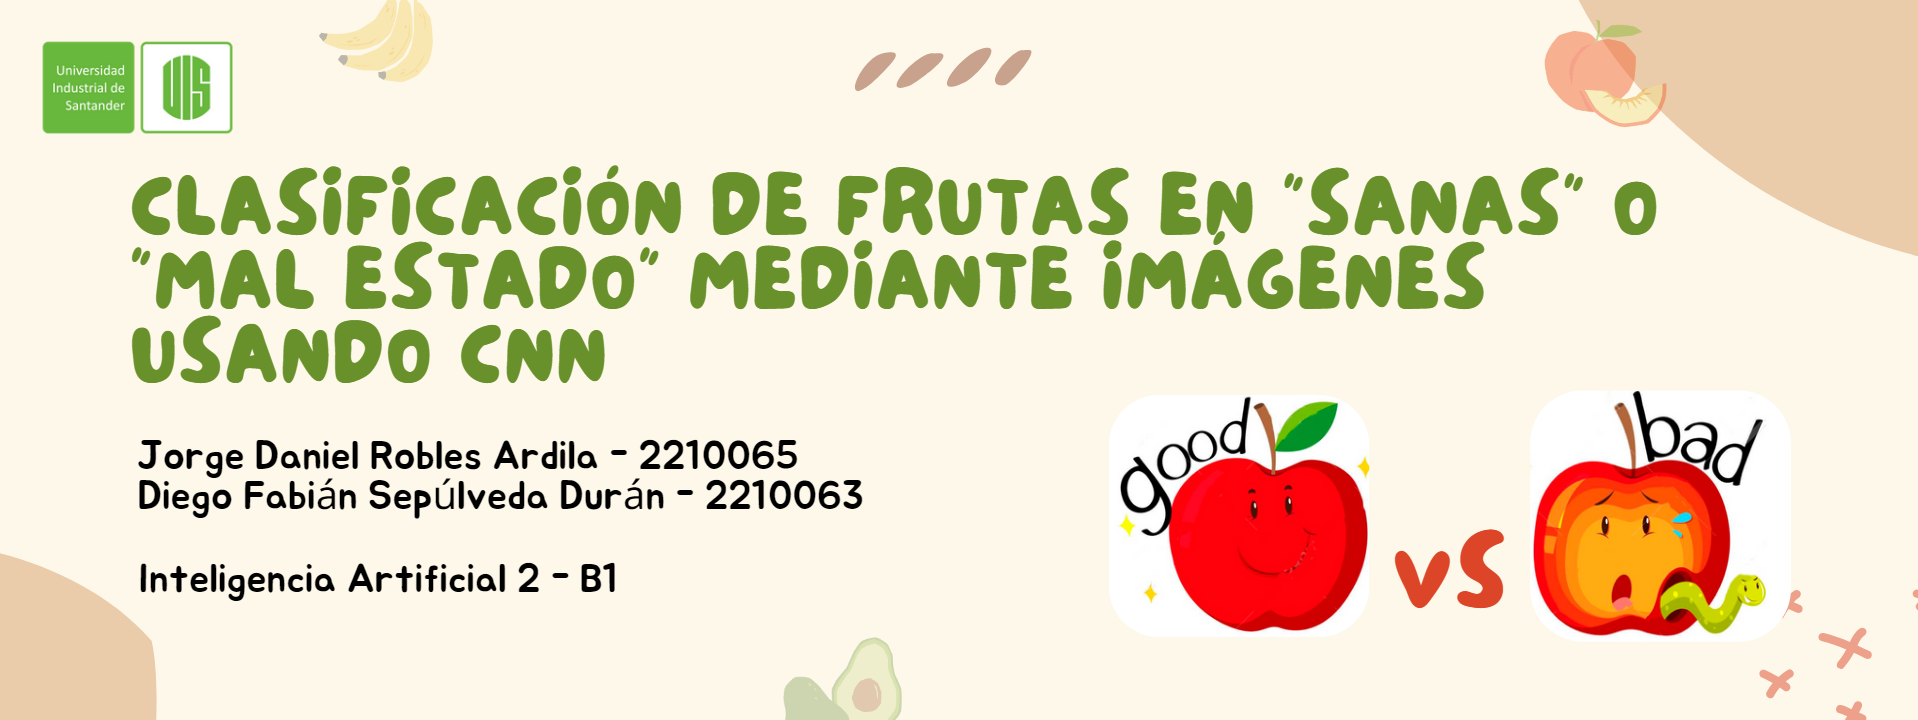

## Dataset:
El proyecto utiliza el dataset [**"Fruit and Vegetable Disease (Healthy vs Rotten)"**](https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten) , que contiene imágenes clasificadas para entrenar modelos de machine learning enfocados en la detección de enfermedades en frutas y vegetales. Está organizado en 28 clases que combinan categorías de imágenes saludables y podridas para 14 tipos diferentes de frutas y vegetales. 

In [7]:
#@title Importar librerias

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import random

In [9]:
# Ruta del dataset
dataset_path = "/kaggle/input/balanced-dataset/Balanced Dataset"

In [10]:
def load_and_resize_images_in_memory(input_folder, target_size=(224, 224)):
    resized_images = []  # Lista para almacenar imágenes redimensionadas
    labels = []  # Lista para almacenar las etiquetas (nombres de las carpetas)

    # Recorrer todas las subcarpetas en la carpeta principal
    for subfolder in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder)

        # Verificar que sea una carpeta
        if os.path.isdir(subfolder_path):
            # Procesar cada imagen en la subcarpeta
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)

                # Verificar si el archivo es una imagen
                if img_path.endswith(('.png', '.jpg', '.jpeg')):
                    # Leer la imagen en color
                    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                    # Convertir de BGR (OpenCV) a RGB
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Redimensionar la imagen
                    resized_img = cv2.resize(img_rgb, target_size)

                    # Almacenar la imagen redimensionada y su etiqueta
                    resized_images.append(resized_img)
                    labels.append(subfolder)  # Etiqueta basada en el nombre de la subcarpeta

    return resized_images, labels

# Uso del código
input_folder = dataset_path  # Carpeta de entrada
resized_images, labels = load_and_resize_images_in_memory(input_folder, target_size=(224, 224))

# Ejemplo: Mostrar cuántas imágenes y etiquetas se han cargado
print("Número de imágenes cargadas:", len(resized_images))
print("Número de etiquetas cargadas:", len(labels))

Número de imágenes cargadas: 5786
Número de etiquetas cargadas: 5786


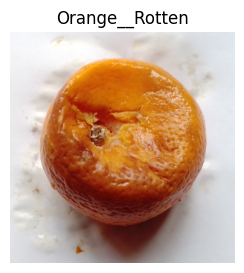

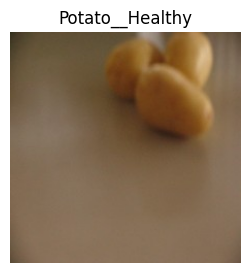

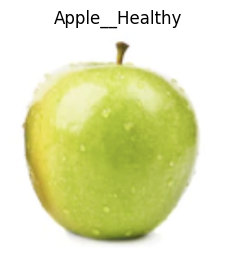

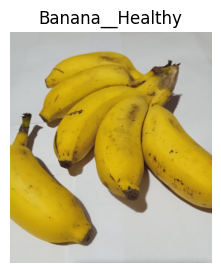

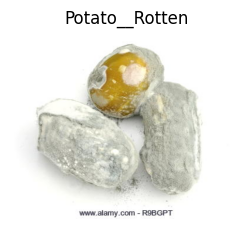

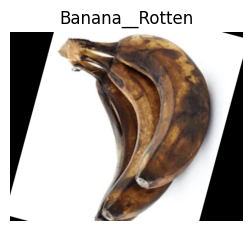

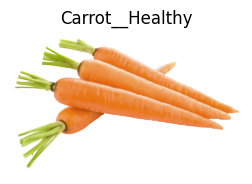

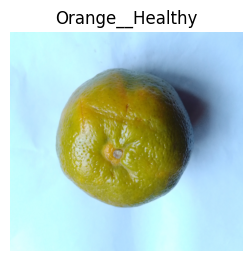

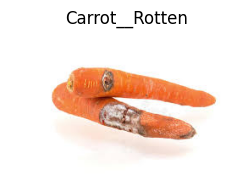

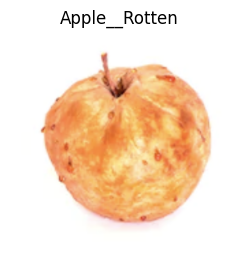

In [11]:
#@title Importe del datase

def show_images_with_labels(folder, num_images=5):
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)

        if os.path.isdir(subfolder_path):
            # Seleccionar las primeras imágenes de la subcarpeta
            image_files = [os.path.join(subfolder_path, img) for img in os.listdir(subfolder_path) if img.endswith(('.png', '.jpg', '.jpeg'))][:num_images]

            # Mostrar las imágenes seleccionadas
            plt.figure(figsize=(num_images * 3, 3))
            for i, img_path in enumerate(image_files):
                img = Image.open(img_path)  # Usar Pillow para cargar la imagen
                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(subfolder)
            plt.show()

# Llamada a la función para visualizar
show_images_with_labels(dataset_path, num_images=1)

In [12]:
labels = []
input_folder = dataset_path

for subfolder in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder)

        # Verificar que sea una carpeta
        if os.path.isdir(subfolder_path):
            # Procesar cada imagen en la subcarpeta
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)

                # Verificar si el archivo es una imagen
                if img_path.endswith(('.png', '.jpg', '.jpeg')):
                    labels.append(subfolder)  # Etiqueta basada en el nombre de la subcarpeta

print("Numero de etiquetas cargadas: ", len(labels))

Numero de etiquetas cargadas:  5786


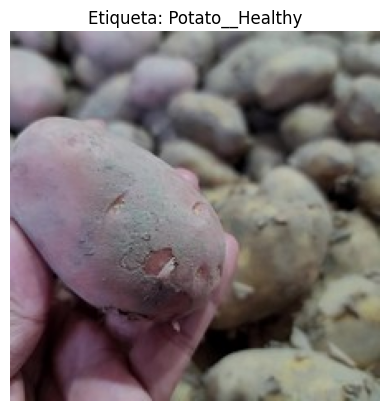

In [13]:
index = random.randint(0, len(resized_images))

# Mostrar la imagen y su etiqueta
plt.imshow(resized_images[index])
plt.title(f"Etiqueta: {labels[index]}")
plt.axis('off')  # Ocultar ejes
plt.show()

In [14]:
# Dividir las etiquetas en frutas y estados
labels_fruits = [label.split('__')[0] for label in labels]
labels_states = [label.split('__')[1] for label in labels]

# Convertir las listas a arreglos de NumPy para facilitar las operaciones
labels_fruits = np.array(labels_fruits)
labels_states = np.array(labels_states)

# Contar la cantidad de cada tipo de fruta
fruit_counts = {fruit: np.sum(labels_fruits == fruit) for fruit in np.unique(labels_fruits)}
for fruit, count in fruit_counts.items():
    print(f"Cantidad de {fruit}: {count}")

# Contar la cantidad de cada estado
state_counts = {state: np.sum(labels_states == state) for state in np.unique(labels_states)}
for state, count in state_counts.items():
    print(f"Cantidad de Frutas en estado {state}: {count}")


Cantidad de Apple: 1158
Cantidad de Banana: 1157
Cantidad de Carrot: 1157
Cantidad de Orange: 1158
Cantidad de Potato: 1156
Cantidad de Frutas en estado Healthy: 2892
Cantidad de Frutas en estado Rotten: 2894


In [15]:
#@title Preprocesamiento

#One-hot Encoding
label_encoder_fruits = LabelEncoder()
y_encoded_fruits = label_encoder_fruits.fit_transform(labels_fruits)
y_categorical_fruits = to_categorical(y_encoded_fruits)

label_encoder_states = LabelEncoder()
y_encoded_states = label_encoder_states.fit_transform(labels_states)
y_categorical_states = to_categorical(y_encoded_states)

In [16]:
# Partición de los datos de entrenamiento y prueba
X_train, X_test, y_fruits_train, y_fruits_test, y_states_train, y_states_test = train_test_split(
    resized_images, y_categorical_fruits, y_categorical_states, test_size=0.2)

# Partición de los datos de validación
X_train, X_val, y_fruits_train, y_fruits_val, y_states_train, y_states_val = train_test_split(
    X_train, y_fruits_train, y_states_train, test_size=0.2)


In [17]:
# Convertir listas de imágenes en arreglos de NumPy
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [18]:
print(X_train.shape)  # Debe ser algo como (n_samples, 224, 224, 3)
print(y_fruits_train.shape)  # Debe coincidir con el número de muestras en X_train
print(y_states_train.shape)  # Igual que arriba


(3702, 224, 224, 3)
(3702, 5)
(3702, 2)


In [19]:
# Modelo de dos salidas
input_layer = layers.Input(shape=(224, 224, 3))

# Bloque convolucional 1
x = layers.Conv2D(64, (3, 3), activation='relu')(input_layer)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.BatchNormalization()(x)

# Bloque convolucional 2
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Aplanamiento y capas densas
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Salida para frutas
fruit_output = layers.Dense(5, activation='softmax', name='fruit_output')(x)

# Salida para estado
state_output = layers.Dense(2, activation='sigmoid', name='state_output')(x)

# Crear el modelo con dos salidas
firstModel = models.Model(inputs=input_layer, outputs=[fruit_output, state_output])

# Compilar el modelo con dos pérdidas
firstModel.compile(optimizer='adam', 
              loss={'fruit_output': 'categorical_crossentropy', 
                    'state_output': 'binary_crossentropy'},
              metrics={
        'fruit_output': 'accuracy',
        'state_output': 'accuracy'
    })

firstModel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 220, 220,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 110, 110,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 110, 110,  │        256 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 108, 108,  │    147,712 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 106, 106,  │    590,080 │ conv2d_2[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 53, 53,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 53, 53,    │      1,024 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 53, 53,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 719104)    │          0 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 92,045,440 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fruit_output        │ (None, 5)         │        325 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 92,832,711 (354.13 MB)

 Trainable params: 92,831,687 (354.12 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [21]:
history = firstModel.fit(
    X_train, {'fruit_output': y_fruits_train, 'state_output': y_states_train},
    validation_data=(X_val, {'fruit_output': y_fruits_val, 'state_output': y_states_val}),
    epochs=10
)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 47s 408ms/step - fruit_output_accuracy: 0.8261 - loss: 0.8797 - state_output_accuracy: 0.8457 - val_fruit_output_accuracy: 0.7851 - val_loss: 0.9446 - val_state_output_accuracy: 0.8240
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 45s 389ms/step - fruit_output_accuracy: 0.8375 - loss: 0.8440 - state_output_accuracy: 0.8467 - val_fruit_output_accuracy: 0.8067 - val_loss: 1.0332 - val_state_output_accuracy: 0.7538
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 46s 396ms/step - fruit_output_accuracy: 0.8545 - loss: 0.7389 - state_output_accuracy: 0.8657 - val_fruit_output_accuracy: 0.7160 - val_loss: 1.3748 - val_state_output_accuracy: 0.7873
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 45s 392ms/step - fruit_output_accuracy: 0.8632 - loss: 0.7041 - state_output_accuracy: 0.8685 - val_fruit_output_accuracy: 0.5389 - val_loss: 2.2970 - val_state_output_accuracy: 0.7419
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 46s 393ms/step - fruit_output_accuracy: 0.8845 - loss: 0.630

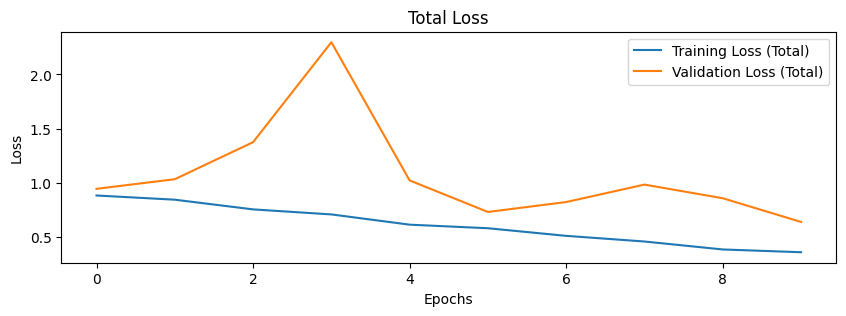

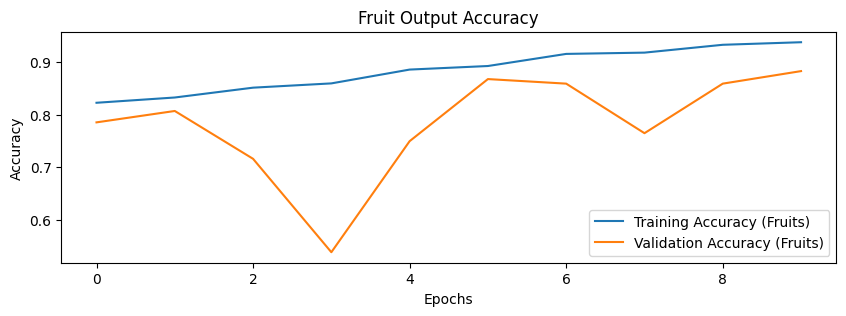

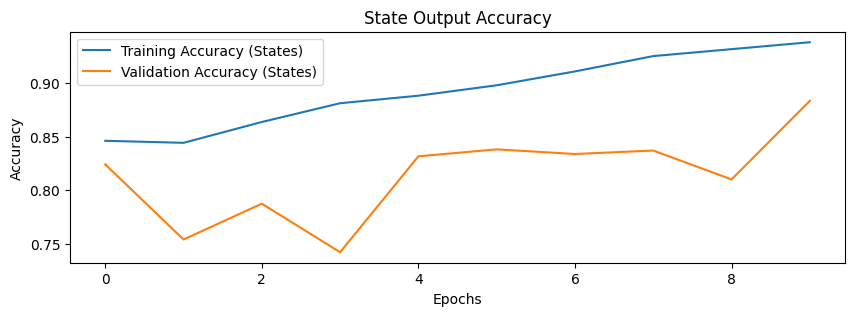

In [22]:
# Graficar la pérdida total del modelo
plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], label='Training Loss (Total)')
plt.plot(history.history['val_loss'], label='Validation Loss (Total)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Total Loss')
plt.legend()
plt.show()

# Graficar la precisión de la salida de frutas
plt.figure(figsize=(10, 3))
plt.plot(history.history['fruit_output_accuracy'], label='Training Accuracy (Fruits)')
plt.plot(history.history['val_fruit_output_accuracy'], label='Validation Accuracy (Fruits)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fruit Output Accuracy')
plt.legend()
plt.show()

# Graficar la precisión de la salida de estados
plt.figure(figsize=(10, 3))
plt.plot(history.history['state_output_accuracy'], label='Training Accuracy (States)')
plt.plot(history.history['val_state_output_accuracy'], label='Validation Accuracy (States)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('State Output Accuracy')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


# Realizar las predicciones con el conjunto de test
y_fruits_pred, y_states_pred = firstModel.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de test
test_loss, fruit_loss, state_loss = firstModel.evaluate(X_test, {'fruit_output': y_fruits_test, 'state_output': y_states_test})

# Obtener la precisión de cada salida
fruit_accuracy = fruit_loss  # Keras devuelve la precisión junto con la pérdida en el mismo orden
state_accuracy = state_loss  # Lo mismo para el estado

print(f"Test Loss: {test_loss}")
print(f"Fruit Loss: {fruit_loss}")
print(f"State Loss: {state_loss}")
print(f"Fruit Accuracy: {fruit_accuracy}")
print(f"State Accuracy: {state_accuracy}")

# Obtener las etiquetas predichas para frutas y estados
y_fruits_pred_classes = np.argmax(y_fruits_pred, axis=1)
y_states_pred_classes = np.argmax(y_states_pred, axis=1)

# Clasificación de frutas
print("Classification Report - Fruits:")
print(classification_report(np.argmax(y_fruits_test, axis=1), y_fruits_pred_classes))

# Clasificación de estados
print("Classification Report - States:")
print(classification_report(y_states_test, y_states_pred_classes))



37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - fruit_output_accuracy: 0.9057 - loss: 0.6436 - state_output_accuracy: 0.8756
Test Loss: 0.6218699812889099
Fruit Loss: 0.9024179577827454
State Loss: 0.8842832446098328
Fruit Accuracy: 0.9024179577827454
State Accuracy: 0.8842832446098328
Classification Report - Fruits:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       253
           1       0.93      0.86      0.89       238
           2       0.91      0.91      0.91       223
           3       0.91      0.93      0.92       228
           4       0.85      0.91      0.88       216

    accuracy                           0.90      1158
   macro avg       0.90      0.90      0.90      1158
weighted avg       0.90      0.90      0.90      1158

Classification Report - States:


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


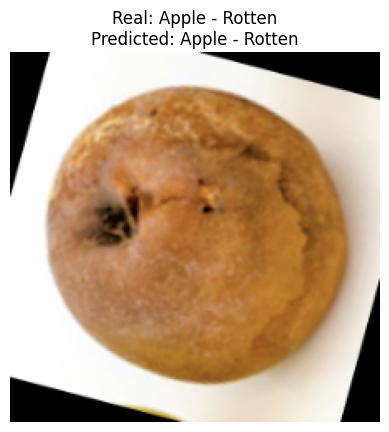

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar una imagen aleatoria del conjunto de prueba
index = np.random.randint(0, len(X_test))  # Elegir un índice aleatorio
image = X_test[index]  # Imagen seleccionada

# Obtener la etiqueta real de la fruta y el estado (usando np.argmax si están codificados one-hot)
true_label_fruit = np.argmax(y_fruits_test[index])  # Etiqueta real de la fruta (índice)
true_label_state = np.argmax(y_states_test[index])  # Etiqueta real del estado (índice)

# Realizar la predicción (obtienes dos salidas: una para frutas y otra para estados)
y_fruit_pred, y_state_pred = firstModel.predict(np.expand_dims(image, axis=0))  # Realizar predicción

# Obtener las etiquetas predichas para frutas y estados (usando np.argmax para obtener el índice de la clase)
predicted_label_fruit = np.argmax(y_fruit_pred, axis=1)[0]  # Etiqueta predicha para la fruta (índice)
predicted_label_state = np.argmax(y_state_pred, axis=1)[0]  # Etiqueta predicha para el estado (índice)

# Mostrar la imagen y las etiquetas
plt.imshow(image)
plt.axis('off')

# Asegurarse de que se muestren las etiquetas correctas
plt.title(f"Real: {label_encoder_fruits.inverse_transform([true_label_fruit])[0]} - {label_encoder_states.inverse_transform([true_label_state])[0]}\n"
          f"Predicted: {label_encoder_fruits.inverse_transform([predicted_label_fruit])[0]} - {label_encoder_states.inverse_transform([predicted_label_state])[0]}")
plt.show()


## Prueba con Modelo Pre-Entrenado ResNet50


In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Cargar el modelo ResNet50 preentrenado en Imagenet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas de ResNet50 para evitar el sobreentrenamiento durante la fase inicial
base_model.trainable = False

# Crear la red neuronal con dos salidas
model_input = layers.Input(shape=(224, 224, 3))  # La entrada es una imagen de 224x224x3
x = base_model(model_input)  # Pasa la entrada a través de ResNet50

# Capa de aplanado (flatten) para que la salida sea un vector 1D
x = layers.GlobalAveragePooling2D()(x)

# Salida para la clasificación de frutas
fruit_output = layers.Dense(5, activation='softmax', name='fruit_output')(x)

# Salida para la clasificación del estado
state_output = layers.Dense(2, activation='sigmoid', name='state_output')(x)

# Modelo final con dos salidas
ResNet50Model = models.Model(inputs=model_input, outputs=[fruit_output, state_output])

# Compilación del modelo
ResNet50Model.compile(optimizer='adam',
                      loss={'fruit_output': 'categorical_crossentropy', 'state_output': 'binary_crossentropy'},
                      metrics={'fruit_output': 'accuracy', 'state_output': 'accuracy'})


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
historyResNet = ResNet50Model.fit(
    X_train, {'fruit_output': y_fruits_train, 'state_output': y_states_train},
    validation_data=(X_val, {'fruit_output': y_fruits_val, 'state_output': y_states_val}),
    epochs=10
)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - fruit_output_accuracy: 0.6801 - loss: 1.3697 - state_output_accuracy: 0.7384 - val_fruit_output_accuracy: 0.9363 - val_loss: 0.4739 - val_state_output_accuracy: 0.9017
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - fruit_output_accuracy: 0.9613 - loss: 0.3439 - state_output_accuracy: 0.9331 - val_fruit_output_accuracy: 0.9374 - val_loss: 0.4055 - val_state_output_accuracy: 0.9168
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - fruit_output_accuracy: 0.9803 - loss: 0.2670 - state_output_accuracy: 0.9383 - val_fruit_output_accuracy: 0.9525 - val_loss: 0.3479 - val_state_output_accuracy: 0.9201
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - fruit_output_accuracy: 0.9872 - loss: 0.2185 - state_output_accuracy: 0.9468 - val_fruit_output_accuracy: 0.9536 - val_loss: 0.3202 - val_state_output_accuracy: 0.9287
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - fruit_output_accuracy: 0.9909 - loss: 0.195

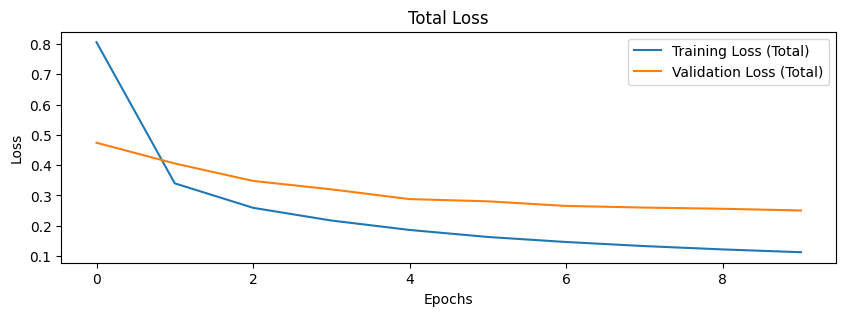

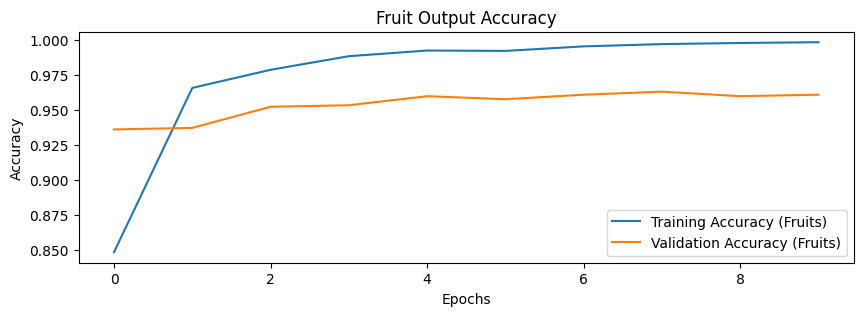

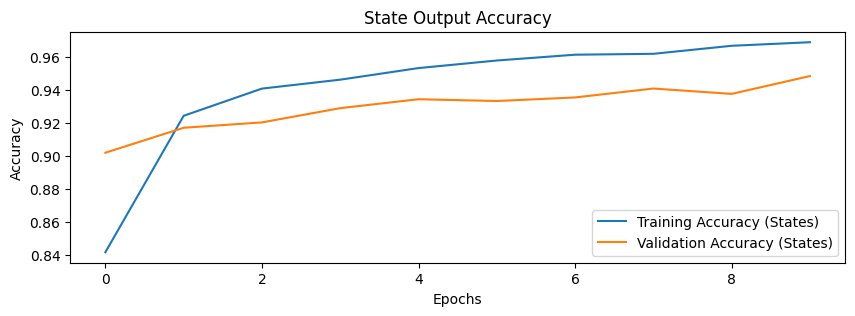

In [28]:
# Graficar la pérdida total del modelo
plt.figure(figsize=(10, 3))
plt.plot(historyResNet.history['loss'], label='Training Loss (Total)')
plt.plot(historyResNet.history['val_loss'], label='Validation Loss (Total)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Total Loss')
plt.legend()
plt.show()

# Graficar la precisión de la salida de frutas
plt.figure(figsize=(10, 3))
plt.plot(historyResNet.history['fruit_output_accuracy'], label='Training Accuracy (Fruits)')
plt.plot(historyResNet.history['val_fruit_output_accuracy'], label='Validation Accuracy (Fruits)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fruit Output Accuracy')
plt.legend()
plt.show()

# Graficar la precisión de la salida de estados
plt.figure(figsize=(10, 3))
plt.plot(historyResNet.history['state_output_accuracy'], label='Training Accuracy (States)')
plt.plot(historyResNet.history['val_state_output_accuracy'], label='Validation Accuracy (States)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('State Output Accuracy')
plt.legend()
plt.show()

In [29]:
test_loss, fruit_loss, state_loss = ResNet50Model.evaluate(
    X_test, {'fruit_output': y_fruits_test, 'state_output': y_states_test}
)

print(f"Test Loss: {test_loss}")
print(f"Fruit Loss: {fruit_loss}")
print(f"State Loss: {state_loss}")
print(f"Fruit Accuracy: {fruit_accuracy}")
print(f"State Accuracy: {state_accuracy}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - fruit_output_accuracy: 0.9841 - loss: 0.1798 - state_output_accuracy: 0.9526
Test Loss: 0.17893874645233154
Fruit Loss: 0.9818652868270874
State Loss: 0.957685649394989
Fruit Accuracy: 0.9024179577827454
State Accuracy: 0.8842832446098328


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


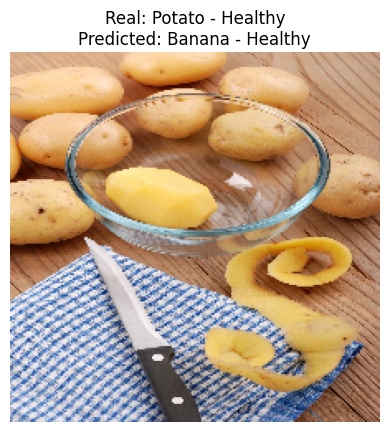

In [30]:
# Seleccionar una imagen aleatoria del conjunto de prueba
index = np.random.randint(0, len(X_test))  # Elegir un índice aleatorio
image = X_test[index]  # Imagen seleccionada

# Redimensionar y preprocesar la imagen
image_resized = cv2.resize(image, (224, 224))
image_preprocessed = preprocess_input(np.expand_dims(image_resized, axis=0))

# Realizar la predicción
y_fruit_pred, y_state_pred = ResNet50Model.predict(image_preprocessed)

# Obtener las etiquetas predichas para frutas y estados
predicted_label_fruit = np.argmax(y_fruit_pred, axis=1)[0]
predicted_label_state = np.argmax(y_state_pred, axis=1)[0]

# Obtener las etiquetas reales (deben estar en formato de índice)
true_label_fruit = np.argmax(y_fruits_test[index])  # Etiqueta real de la fruta
true_label_state = np.argmax(y_states_test[index])  # Etiqueta real del estado

# Mostrar la imagen con las predicciones y las etiquetas reales
plt.imshow(image)
plt.axis('off')
plt.title(f"Real: {label_encoder_fruits.inverse_transform([true_label_fruit])[0]} - {label_encoder_states.inverse_transform([true_label_state])[0]}\n"
          f"Predicted: {label_encoder_fruits.inverse_transform([predicted_label_fruit])[0]} - {label_encoder_states.inverse_transform([predicted_label_state])[0]}")
plt.show()



## Prueba con Modelo Pre-Entrenado MobileNet

In [31]:
from tensorflow.keras.applications import MobileNetV2
# 1. Cargar MobileNetV2 preentrenado con pesos de ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas base (no se entrenarán)
base_model.trainable = False

# Crear la red neuronal con dos salidas
model_input = layers.Input(shape=(224, 224, 3))  # La entrada es una imagen de 224x224x3
x = base_model(model_input)  # Pasa la entrada a través de ResNet50

# Capa de aplanado (flatten) para que la salida sea un vector 1D
x = layers.GlobalAveragePooling2D()(x)

# Salida para la clasificación de frutas
fruit_output = layers.Dense(5, activation='softmax', name='fruit_output')(x)

# Salida para la clasificación del estado
state_output = layers.Dense(2, activation='sigmoid', name='state_output')(x)

# Modelo final con dos salidas
modelMobileNet = models.Model(inputs=model_input, outputs=[fruit_output, state_output])

# Compilación del modelo
modelMobileNet.compile(optimizer='adam',
                      loss={'fruit_output': 'categorical_crossentropy', 'state_output': 'binary_crossentropy'},
                      metrics={'fruit_output': 'accuracy', 'state_output': 'accuracy'})

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
historyMobileNet = modelMobileNet.fit(
    X_train, {'fruit_output': y_fruits_train, 'state_output': y_states_train},
    validation_data=(X_val, {'fruit_output': y_fruits_val, 'state_output': y_states_val}),
    epochs=10
)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - fruit_output_accuracy: 0.4510 - loss: 1.9399 - state_output_accuracy: 0.6606 - val_fruit_output_accuracy: 0.6717 - val_loss: 1.2884 - val_state_output_accuracy: 0.7851
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - fruit_output_accuracy: 0.7098 - loss: 1.1660 - state_output_accuracy: 0.8194 - val_fruit_output_accuracy: 0.7333 - val_loss: 1.1312 - val_state_output_accuracy: 0.8078
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - fruit_output_accuracy: 0.7643 - loss: 1.0035 - state_output_accuracy: 0.8373 - val_fruit_output_accuracy: 0.7559 - val_loss: 1.0636 - val_state_output_accuracy: 0.8132
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - fruit_output_accuracy: 0.7951 - loss: 0.9296 - state_output_accuracy: 0.8485 - val_fruit_output_accuracy: 0.7646 - val_loss: 1.0086 - val_state_output_accuracy: 0.8197
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - fruit_output_accuracy: 0.8229 - loss: 0.8452 - stat

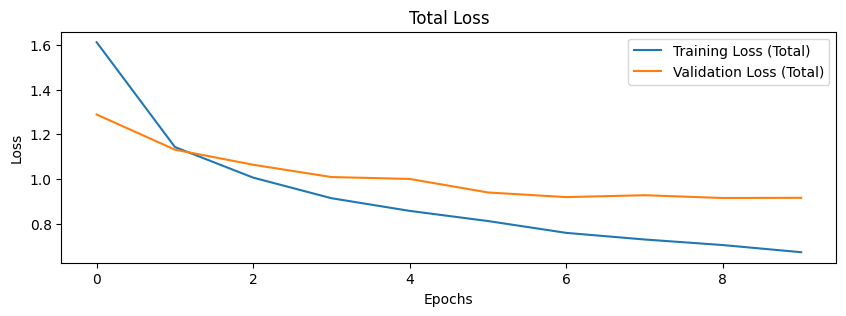

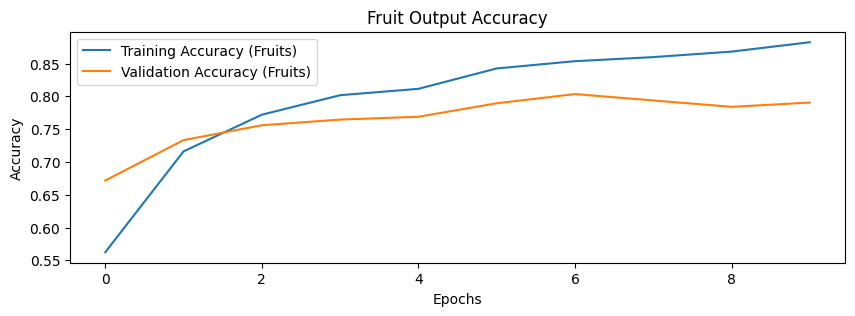

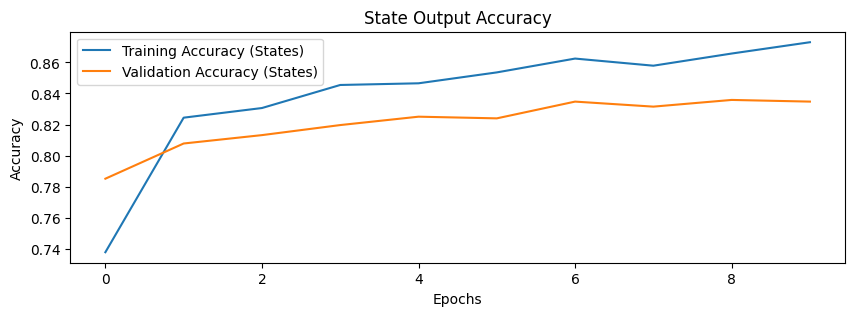

In [33]:
# Graficar la pérdida total del modelo
plt.figure(figsize=(10, 3))
plt.plot(historyMobileNet.history['loss'], label='Training Loss (Total)')
plt.plot(historyMobileNet.history['val_loss'], label='Validation Loss (Total)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Total Loss')
plt.legend()
plt.show()

# Graficar la precisión de la salida de frutas
plt.figure(figsize=(10, 3))
plt.plot(historyMobileNet.history['fruit_output_accuracy'], label='Training Accuracy (Fruits)')
plt.plot(historyMobileNet.history['val_fruit_output_accuracy'], label='Validation Accuracy (Fruits)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fruit Output Accuracy')
plt.legend()
plt.show()

# Graficar la precisión de la salida de estados
plt.figure(figsize=(10, 3))
plt.plot(historyMobileNet.history['state_output_accuracy'], label='Training Accuracy (States)')
plt.plot(historyMobileNet.history['val_state_output_accuracy'], label='Validation Accuracy (States)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('State Output Accuracy')
plt.legend()
plt.show()

In [34]:
test_loss, fruit_loss, state_loss = modelMobileNet.evaluate(
    X_test, {'fruit_output': y_fruits_test, 'state_output': y_states_test}
)

print(f"Test Loss: {test_loss}")
print(f"Fruit Loss: {fruit_loss}")
print(f"State Loss: {state_loss}")
print(f"Fruit Accuracy: {fruit_accuracy}")
print(f"State Accuracy: {state_accuracy}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - fruit_output_accuracy: 0.7855 - loss: 0.8898 - state_output_accuracy: 0.8317
Test Loss: 0.8957707285881042
Fruit Loss: 0.7832469940185547
State Loss: 0.8341968655586243
Fruit Accuracy: 0.9024179577827454
State Accuracy: 0.8842832446098328


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


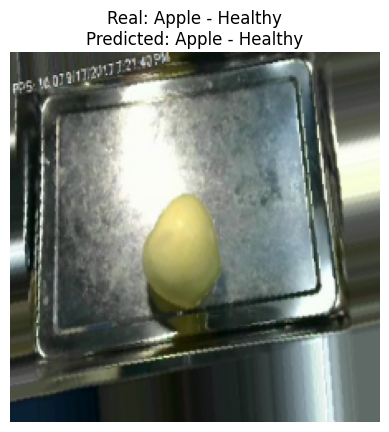

In [35]:
# Seleccionar una imagen aleatoria del conjunto de prueba
index = np.random.randint(0, len(X_test))  # Elegir un índice aleatorio
image = X_test[index]  # Imagen seleccionada

# Redimensionar y preprocesar la imagen
image_resized = cv2.resize(image, (224, 224))
image_preprocessed = preprocess_input(np.expand_dims(image_resized, axis=0))

# Realizar la predicción
y_fruit_pred, y_state_pred = ResNet50Model.predict(image_preprocessed)

# Obtener las etiquetas predichas para frutas y estados
predicted_label_fruit = np.argmax(y_fruit_pred, axis=1)[0]
predicted_label_state = np.argmax(y_state_pred, axis=1)[0]

# Obtener las etiquetas reales (deben estar en formato de índice)
true_label_fruit = np.argmax(y_fruits_test[index])  # Etiqueta real de la fruta
true_label_state = np.argmax(y_states_test[index])  # Etiqueta real del estado

# Mostrar la imagen con las predicciones y las etiquetas reales
plt.imshow(image)
plt.axis('off')
plt.title(f"Real: {label_encoder_fruits.inverse_transform([true_label_fruit])[0]} - {label_encoder_states.inverse_transform([true_label_state])[0]}\n"
          f"Predicted: {label_encoder_fruits.inverse_transform([predicted_label_fruit])[0]} - {label_encoder_states.inverse_transform([predicted_label_state])[0]}")
plt.show()